In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dreimac.toroidalcoords import ToroidalCoords
from dreimac.circularcoords import CircularCoords
from dreimac.utils import GeometryExamples, PlotUtils, CircleMapUtils

from persim import plot_diagrams

%load_ext autoreload
%autoreload 2

In [2]:
# you must download the zip from here: http://www.cs.columbia.edu/CAVE/databases/SLAM_coil-20_coil-100/coil-20/coil-20-unproc.zip
# and unzip it in "[this notebook's directory]/data/"

from PIL import Image
import os

data_directory = "./data/coil-20-unproc/"
file_names = os.listdir(data_directory)
file_names.sort()

X = []
imgs = []
for file_name in file_names:
    image = Image.open(data_directory + file_name)
    l, h = image.size
    imgs.append(image)
    x = np.array(image)
    X.append(x.reshape(x.shape[0] * x.shape[1]))

X = np.array(X)
imgs = np.array(imgs)

/var/folders/54/vxgwxr5943zb3yr6mmpzm4tw0000gn/T/ipykernel_90668/73783905.py:21: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  imgs = np.array(imgs)
/var/folders/54/vxgwxr5943zb3yr6mmpzm4tw0000gn/T/ipykernel_90668/73783905.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imgs = np.array(imgs)


/opt/homebrew/Caskroom/miniforge/base/envs/dreimac-opt/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


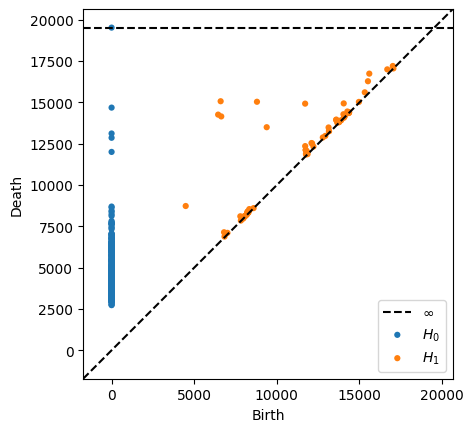

In [3]:
cc = CircularCoords(X, n_landmarks = X.shape[0])
plot_diagrams(cc.dgms_)

In [4]:
from scipy.cluster.hierarchy import linkage, fcluster

def single_linkage(point_cloud, distance_scale):
    single_linkage_hierarchy = linkage(point_cloud, "single")
    return fcluster(single_linkage_hierarchy, distance_scale, criterion="distance") - 1


In [5]:
clusters = single_linkage(X, 10000)
coordinatizators = [ CircularCoords(X[clusters==i], n_landmarks = X[clusters==i].shape[0]) for i in range(max(clusters)+1)]

/opt/homebrew/Caskroom/miniforge/base/envs/dreimac-opt/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dreimac-opt/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dreimac-opt/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dreimac-opt/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dreimac-opt/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more col

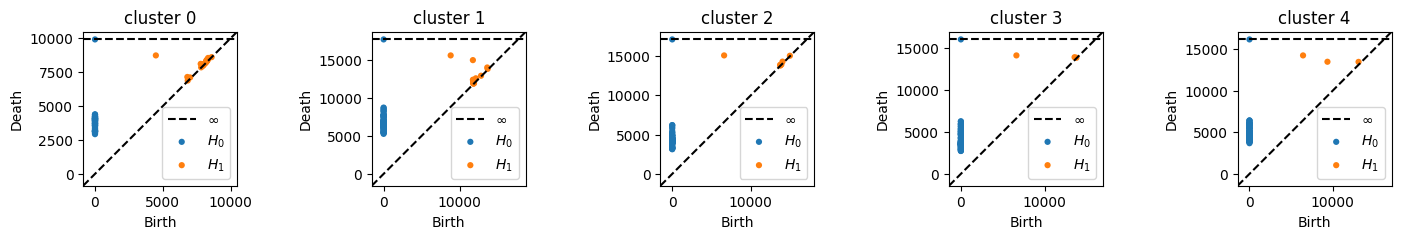

In [6]:
_, axs = plt.subplots(nrows=1, ncols = len(coordinatizators), figsize=(18,2))
for i,axc in enumerate(zip(axs,coordinatizators)):
    ax, c = axc
    plot_diagrams(c.dgms_,ax=ax)
    ax.title.set_text("cluster " + str(i))

In [16]:
# get circular coordinates for each cluster
perc = 0.1
circular_coords = [
    coordinatizator.get_coordinates(perc=perc, cohomology_class=0)
    for coordinatizator in coordinatizators
]


Exception: The selected cohomology class is too short.

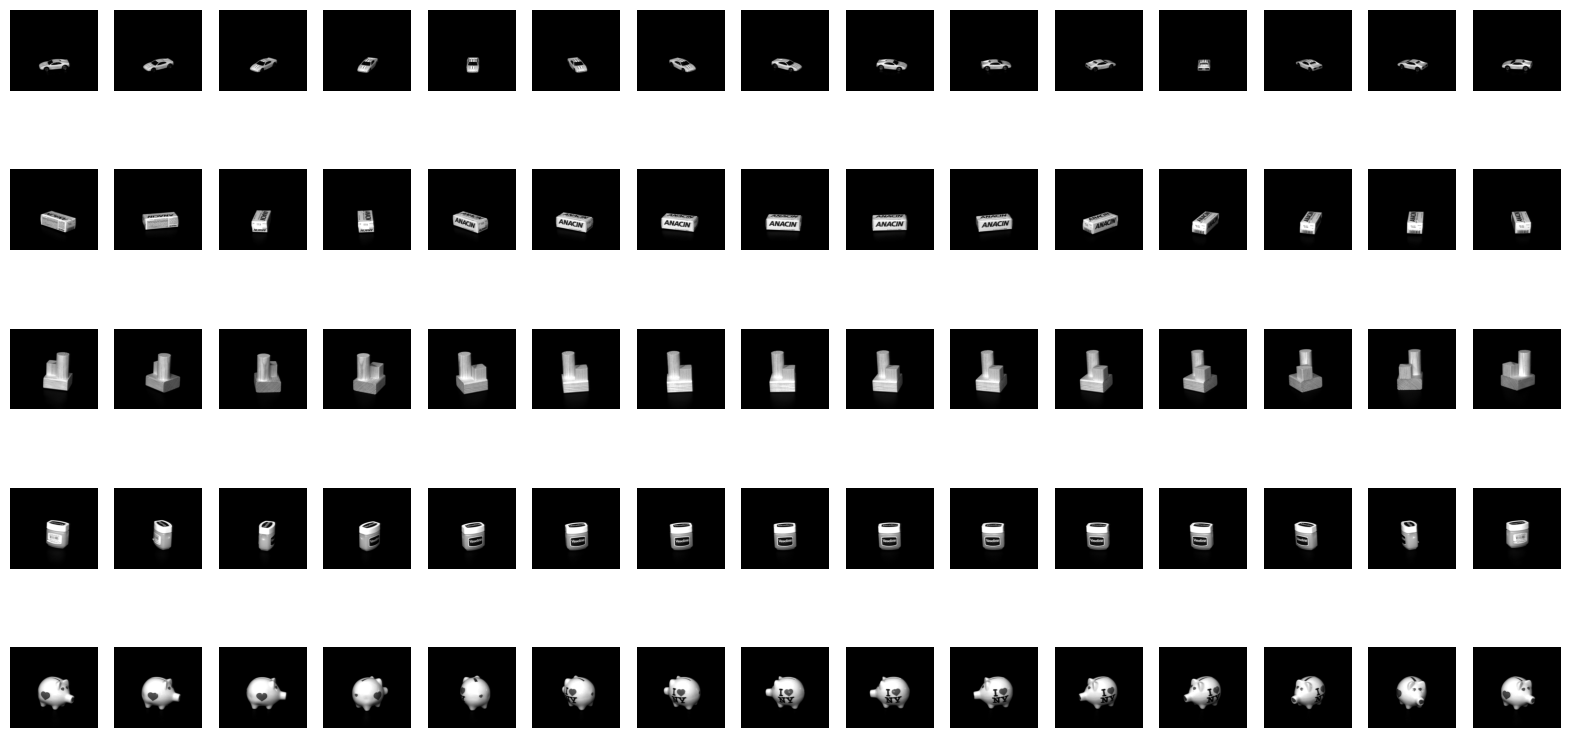

In [14]:
n_images_to_plot = 15

n_clusters = max(clusters) + 1

def representative_point_at_index(circular_coordinate, index_in_circle, n_bins_circle):
    return np.argmin(
        np.abs(circular_coordinate - (index_in_circle / n_bins_circle) * 2 * np.pi)
    )

f, axs = plt.subplots(n_clusters, n_images_to_plot, figsize=(20, 10))
for i in range(n_clusters):
    for j in range(n_images_to_plot):
        coordinates = circular_coords[i]
        index = representative_point_at_index(coordinates, j, n_images_to_plot)
        axs[i, j].imshow(imgs[clusters==i][index], cmap="gray")
        axs[i, j].axis("Off")


---------------------------------

In [15]:
coordinatizators[0]._harm_reps

(array([-0.01656788,  0.01656796, -0.01656779, -0.01656769,  0.01656802,
        -0.01656798, -0.01656786, -0.00740936, -0.00915845, -0.00174909,
        -0.00566031, -0.00391121, -0.00699641, -0.0030852 , -0.00648626,
        -0.00340107, -0.00668063, -0.00327956, -0.00660774, -0.00332818,
        -0.00663204, -0.01656806, -0.00330386, -0.00663198, -0.00332812,
        -0.00660762, -0.0032795 , -0.00668052, -0.00340102, -0.00648623,
        -0.0030852 , -0.00699649, -0.00391129, -0.00566042, -0.00174914,
        -0.00915854, -0.0074094 , -0.01656772, -0.01656801, -0.0165677 ,
        -0.01656784, -0.01656781, -0.01656798, -0.01656779, -0.01656785,
        -0.01656797, -0.01656787, -0.01656778, -0.0165679 , -0.01656796,
        -0.01656792, -0.01656777, -0.01656794, -0.01656792, -0.01656773,
        -0.01656804, -0.01656778, -0.01656786, -0.01656785, -0.01656806,
        -0.01656766, -0.01656787, -0.01656798, -0.01656789, -0.01656778,
        -0.016568  , -0.01656782, -0.01656785, -0.0

In [9]:
chose_cluster = 1
toroidal_coordinatizator = ToroidalCoords(X[clusters==chose_cluster], n_landmarks = X[clusters==chose_cluster].shape[0], prime=41)
tc = toroidal_coordinatizator.get_coordinates(perc=0.1 , cohomology_classes = [0,1])
toroidal_coordinatizator.change_basis_

/opt/homebrew/Caskroom/miniforge/base/envs/dreimac-opt/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


number of faces:  258


LinAlgError: Matrix is not positive definite

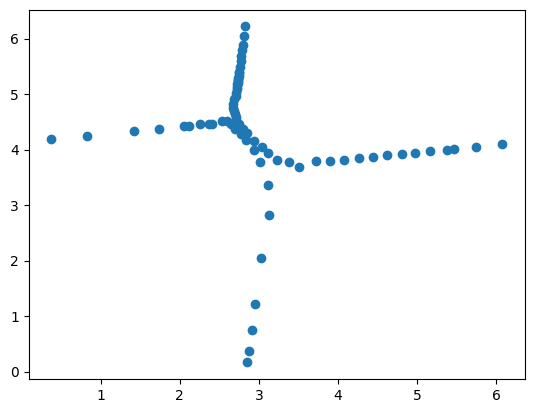

In [13]:
plt.scatter(CircleMapUtils.offset(tc.T[:,0],np.pi), tc.T[:,1])

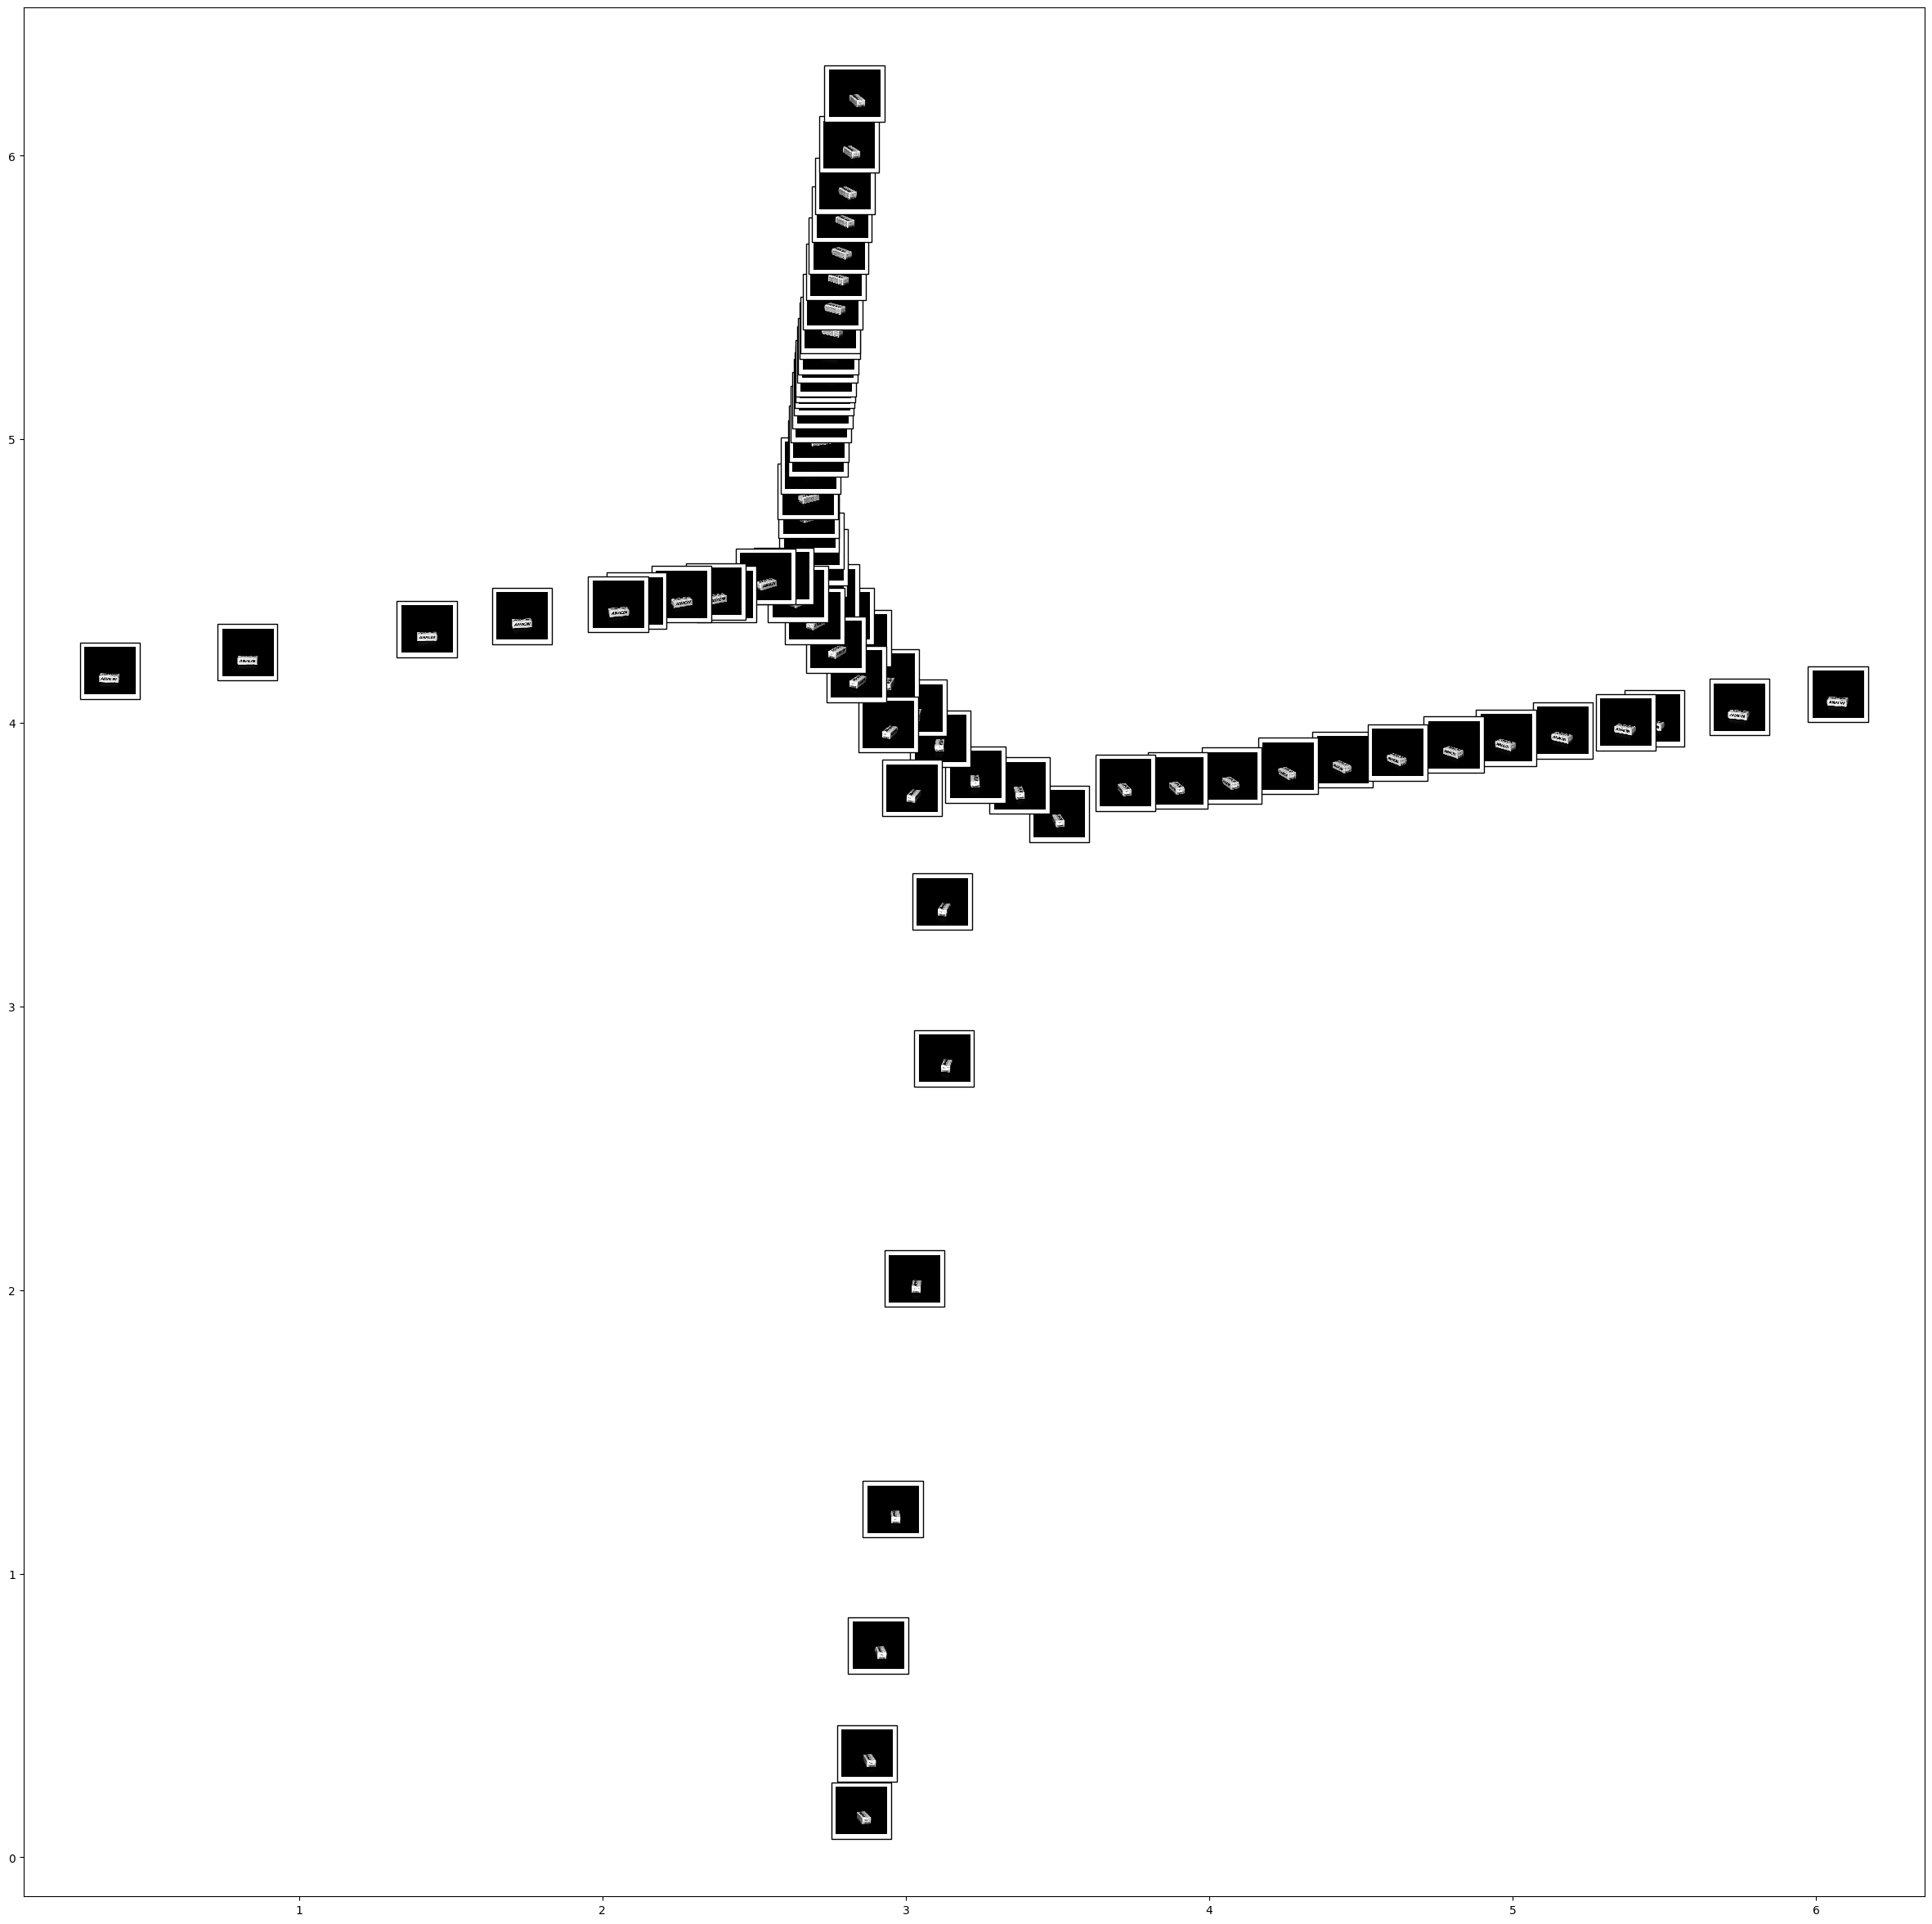

In [14]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig, ax = plt.subplots(figsize=(30,30))

x_coords = CircleMapUtils.offset(tc.T[:,0],np.pi)
y_coords = tc.T[:,1]

ax.scatter(x_coords, y_coords)

for i in range(0,tc.shape[1]):
    x, y = x_coords[i], y_coords[i]
    im = imgs[clusters==chose_cluster][i]
    ab = AnnotationBbox(OffsetImage(im, cmap="gray",zoom=0.1), (x,y))
    ax.add_artist(ab)

number of faces:  535
0.0
number of faces:  452
0.0


/opt/homebrew/Caskroom/miniforge/base/envs/dreimac/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


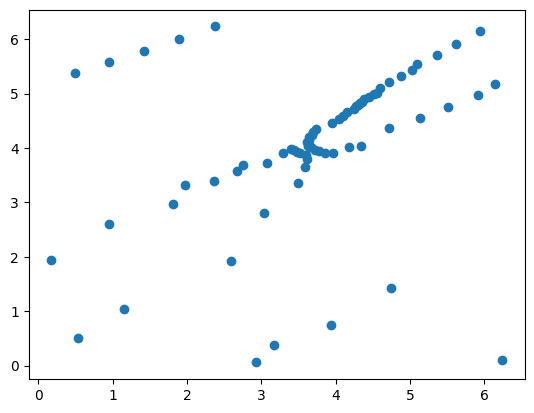

In [17]:
circular_coordinatizator = CircularCoords(X[clusters==1], n_landmarks = X[clusters==1].shape[0], prime=3)
cc1 = circular_coordinatizator.get_coordinates(perc=0.5 , cohomology_class = 0)
cc2 = circular_coordinatizator.get_coordinates(perc=0.1 , cohomology_class = 1)
plt.scatter(cc1, cc2)

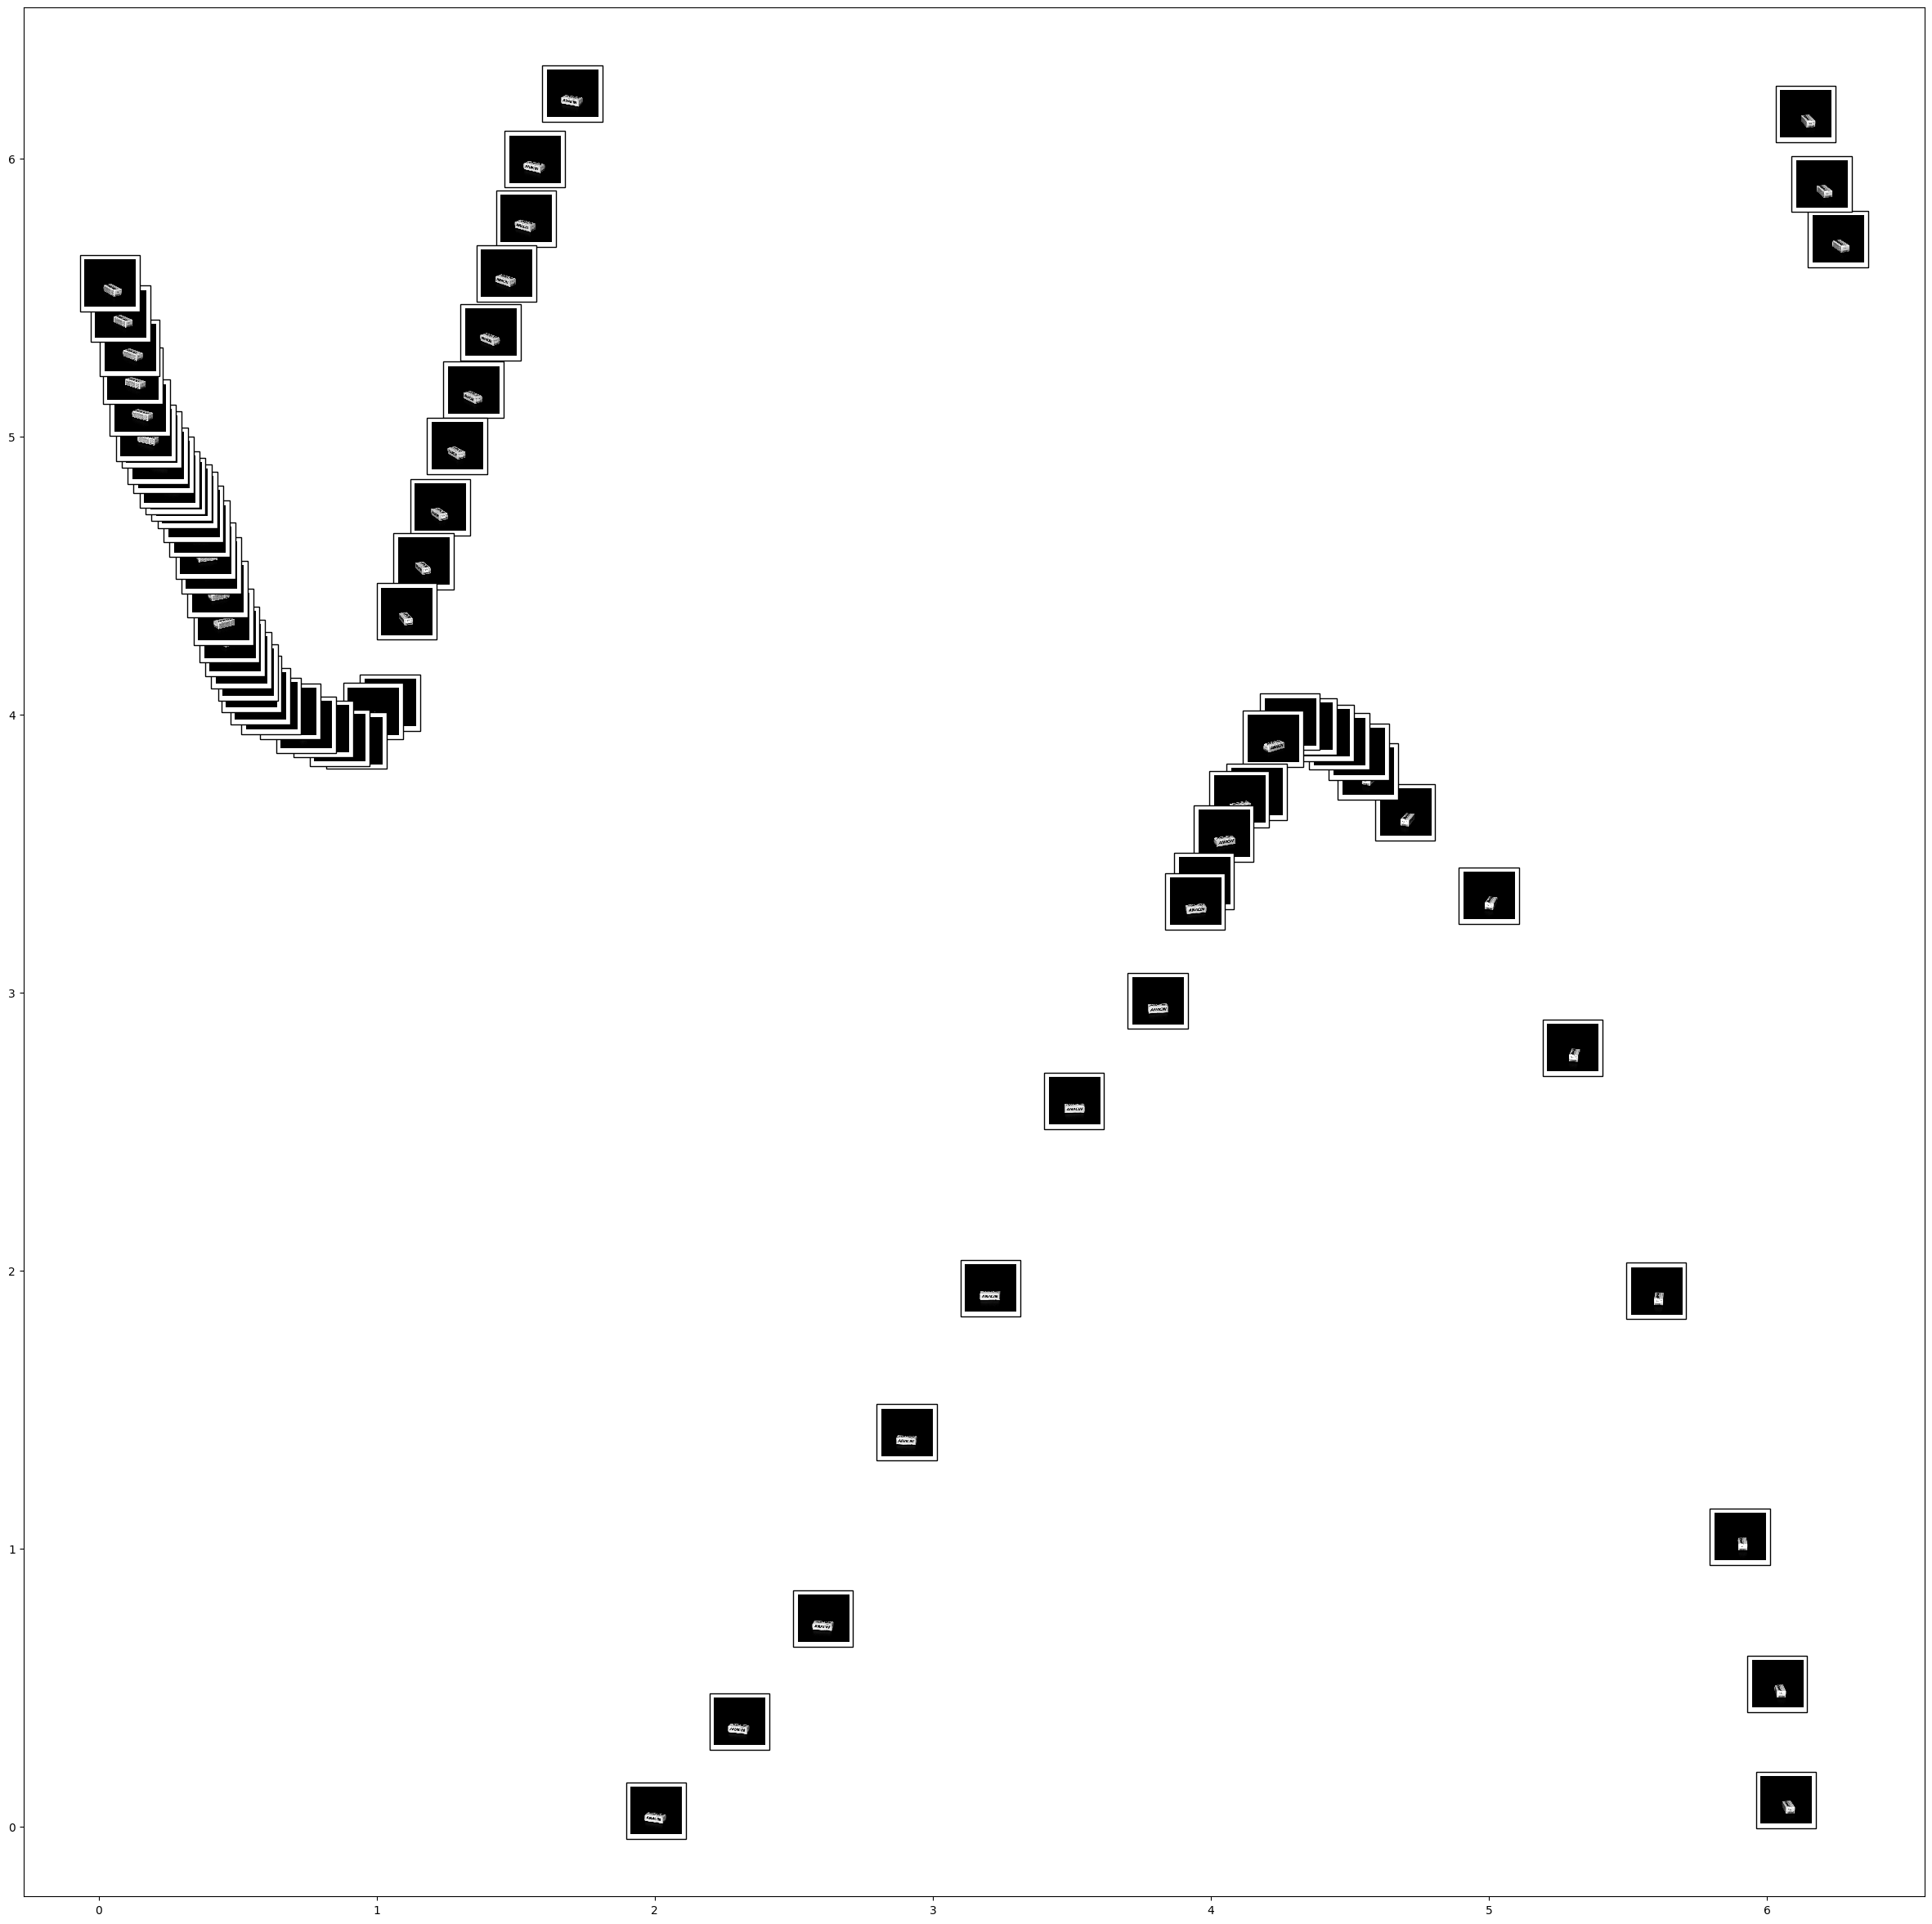

In [14]:
fig, ax = plt.subplots(figsize=(30,30))

x_coords = cc1
y_coords = cc2

ax.scatter(x_coords, y_coords)

for i in range(0,tc.shape[1]):
    x, y = x_coords[i], y_coords[i]
    im = imgs[clusters==chose_cluster][i]
    ab = AnnotationBbox(OffsetImage(im, cmap="gray",zoom=0.1), (x,y))
    ax.add_artist(ab)

----------

In [37]:
print(cc.dgms_[1][:7,0])
print(cc.dgms_[1][:7,1])
print(cc.dgms_[0][cc.dgms_[0][:,1] > 8797.41796875])

[ 6599.9453125   6448.41601562  6636.35644531  8797.41796875
  4485.39453125  9386.85058594 11713.06152344]
[15071.60546875 14262.19824219 14152.17675781 15039.8515625
  8731.47460938 13499.69238281 14926.43359375]
[[    0.         12004.37304688]
 [    0.         12860.51660156]
 [    0.         13119.82226562]
 [    0.         14685.7421875 ]
 [    0.                    inf]]


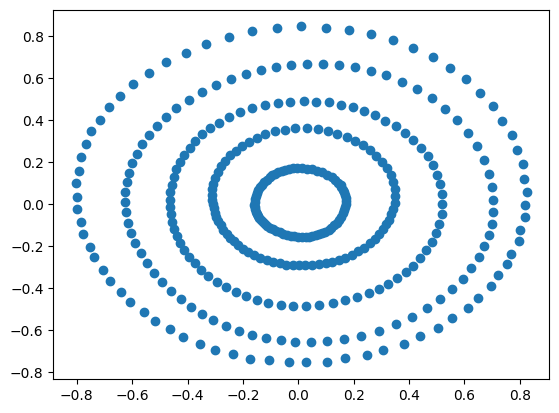

In [31]:
from sklearn.manifold import Isomap

n_imgs_per_class = 72
n_classes = 5

reduced_point_clouds = []
for i in range(n_classes):
    Y = X[i*n_imgs_per_class:(i+1)*n_imgs_per_class,:]
    dim_reducer = Isomap(n_neighbors=4, n_components = 2)
    Y_reduced = dim_reducer.fit_transform(Y)/(i+30)
    Y_reduced = Y_reduced/max(np.linalg.norm(Y_reduced,axis=0)) * (n_classes-i)
    reduced_point_clouds.append(Y_reduced)

X_reduced = np.vstack(reduced_point_clouds)

import matplotlib.pyplot as plt
plt.scatter(X_reduced[:,0], X_reduced[:,1])

In [92]:
tc = ToroidalCoords(X, n_landmarks=X.shape[0])
cohomology_classes = [0,1,2,3]
toroidal_coords = list(tc.get_coordinates(perc = 0.5, cohomology_classes = cohomology_classes))

/opt/homebrew/Caskroom/miniforge/base/envs/fiberwise-dim-red/lib/python3.10/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


In [93]:
circular_coords = [cc.get_coordinates(perc=0.3, cohomology_class= i) for i in [4]]
print(len(circular_coords))
circular_coords = circular_coords + toroidal_coords
print(len(circular_coords))
c_cols = [CircleMapUtils.levelset_coloring(c) for c in circular_coords]


1
5


In [85]:
tc.change_basis_
#tc.gram_matrix_

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1.]])

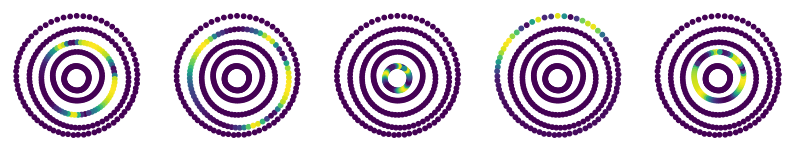

In [94]:
PlotUtils.plot_2d_scatter_with_different_colorings(X_reduced, c_cols, point_size=10)

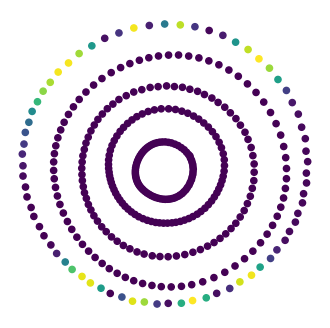

In [84]:
color = CircleMapUtils.levelset_coloring(cc.get_coordinates(perc=0.3, cohomology_class= 5))
PlotUtils.plot_2d_scatter_with_different_colorings(X_reduced, [color], point_size=20)

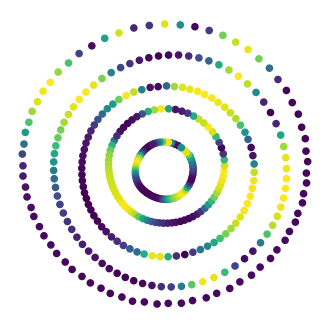

In [95]:
sum_coordinate = CircleMapUtils.linear_combination(np.array(circular_coords), np.array([1,1,1,1,1]))
sum_colors = CircleMapUtils.levelset_coloring(sum_coordinate)
PlotUtils.plot_2d_scatter_with_different_colorings(X_reduced, [sum_colors], point_size=20)

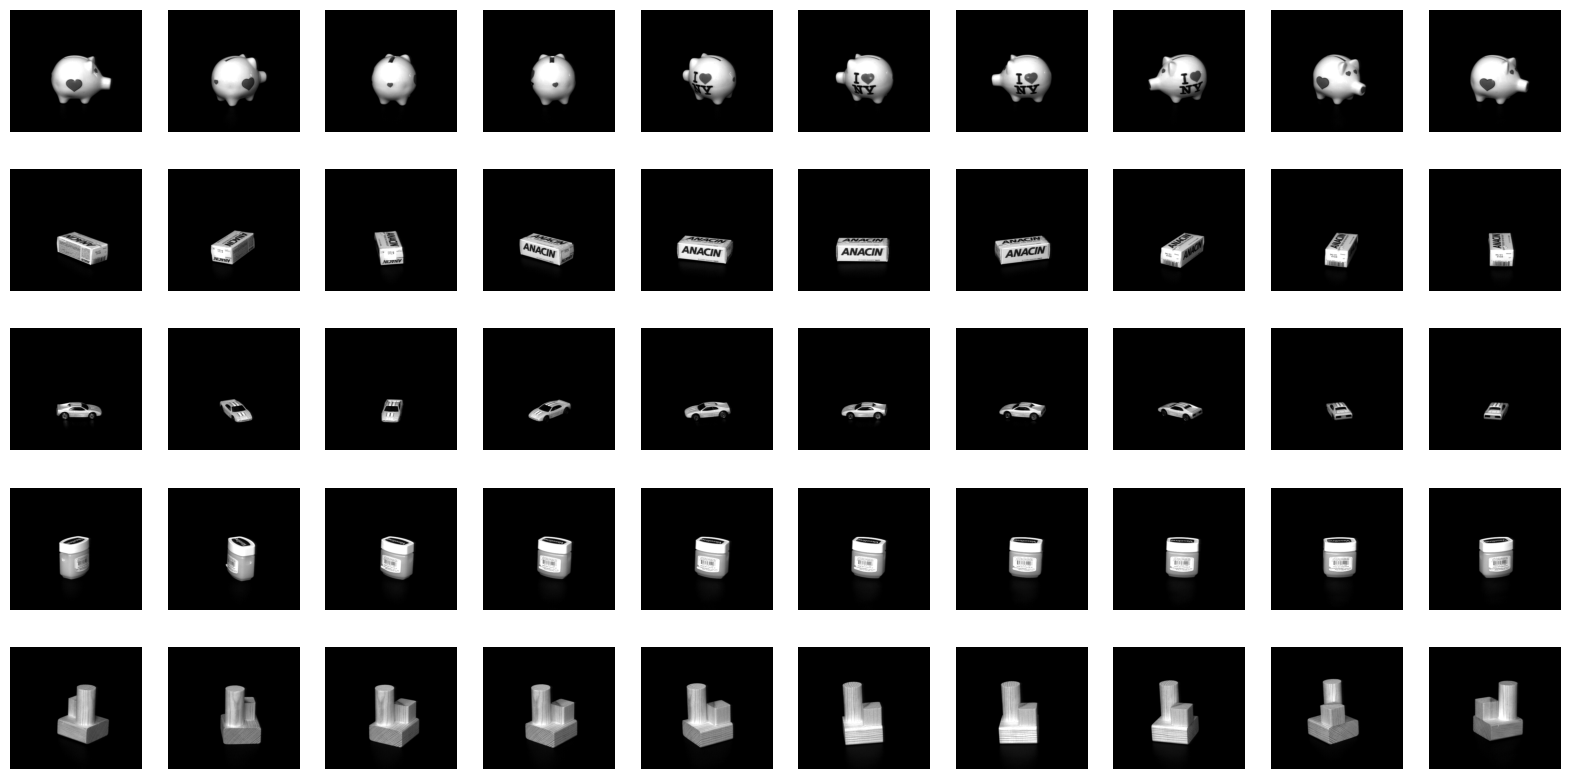

In [96]:
n_images_to_plot = 10


def representative_point_at_index(circular_coordinate, index_in_circle, n_bins_circle):
    return np.argmin(
        np.abs(circular_coordinate - (index_in_circle / n_bins_circle) * 2 * np.pi)
    )


def find_circular_coordinate_corresponding_to_class(
    circular_coordinates, n_classes, n_elements_per_class
):
    corresponding = []
    for i in range(n_classes):
        coords_according_to_circ_coord = np.array( [ circular_coordinates[i][j * n_elements_per_class : (j + 1) * n_elements_per_class] for j in range(n_classes) ])
        variations = np.linalg.norm(coords_according_to_circ_coord, axis=1)
        corresponding.append(np.argmax(variations))
    return corresponding


corresponding_classes = find_circular_coordinate_corresponding_to_class(
    circular_coords, n_classes, n_imgs_per_class
)

f, axs = plt.subplots(n_classes, n_images_to_plot, figsize=(20, 10))
for i in range(n_classes):
    for j in range(n_images_to_plot):
        corresponding_class = corresponding_classes[i]
        index = representative_point_at_index(
            sum_coordinate[ corresponding_class * (n_imgs_per_class) : (corresponding_class + 1) * (n_imgs_per_class) ], j, n_images_to_plot,
        )
        axs[i, j].imshow(imgs[i * (n_imgs_per_class) + index], cmap="gray")
        axs[i, j].axis("Off")
